In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string

In [2]:
zipFilePath='D:/srujana/courses/SaleWebDesign.Com-30-Real-World-Data-Science-Machine-Learning-Projects-2021/\
25 Project-24  Fake News Classifier Using NLP/139 Fake news classifier files.zip'

In [3]:
with ZipFile(zipFilePath, 'r') as zip:
    zip.printdir() 
    zip.extractall()


File Name                                             Modified             Size
Notebook/Fake News Classifier.ipynb            2021-01-02 23:21:10       369993
Notebook/nlp_utils.py                          2020-06-28 21:05:50         5069
Notebook/train.csv                             2020-07-27 20:57:38     98628550


In [4]:
df=pd.read_csv('Notebook/train.csv')

In [5]:
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [7]:
df.title

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 20800, dtype: object

In [8]:
pd.set_option('display.max_colwidth',-1)

C:\Users\NIMMI\AppData\Local\Temp/ipykernel_1360/1746786568.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [9]:
df.title

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [10]:
df.author.value_counts()

Pam Key                                      243
admin                                        193
Jerome Hudson                                166
Charlie Spiering                             141
John Hayward                                 140
                                            ... 
Jeremy R. Hammond                            1  
Vic Bishop                                   1  
Douglas Martin                               1  
Najim Rahim and Fahim Abed                   1  
Michael J. de la Merced and Rachel Abrams    1  
Name: author, Length: 4201, dtype: int64

In [11]:
df.isnull().sum()

id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

<AxesSubplot:>

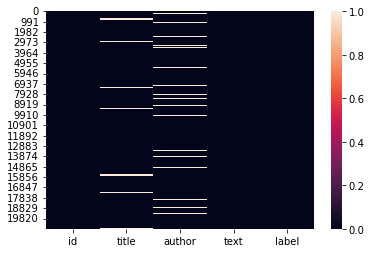

In [12]:
sns.heatmap(df.isnull())

In [13]:
df=df.dropna()

In [14]:
df.reset_index(inplace=True)

<AxesSubplot:>

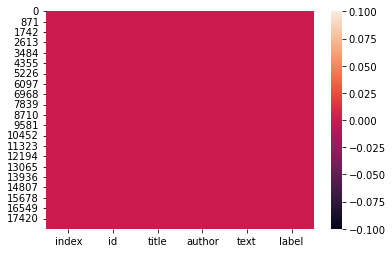

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.label.value_counts()

0    10361
1    7924 
Name: label, dtype: int64

# Text cleaning / Pre-processing text data
Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

Remove punctuation
Tokenization
Sentence Tokenizing
Word Tokenizing
Remove stopwords
Lemmatize/Stem
The first three steps are implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are helpful but not critical.

**Tokenizing**
Tokenization: Divide the texts into words or smaller sub-texts, which will enable good generalization of relationship between the texts and the labels. This determines the “vocabulary”of the dataset (set of unique tokens present in the data).

In [17]:
alphaNumeric =  lambda x: re.sub('\w*\d\w*',' ', x)
removeNonAscII =  lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)
removeNewline =  lambda x: re.sub("\n",' ', x)
converLowerCase =  lambda x: re.sub("[%s]" % re.escape(string.punctuation),' ', x.lower())
df1=df.copy()

In [18]:
df1.iloc[1:10]['text']

1    Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and

In [19]:
df['text']=df['text'].map(alphaNumeric).map(removeNonAscII).map(removeNewline).map(converLowerCase)

In [20]:
df.iloc[1:10]['text']

1    ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination   hillary clinton remains the big woman on campus in leafy  liberal wellesley  massachusetts  everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way miss havisham forever wore that wedding dress   speaking of great expectations  hillary rodham overflowed with them   years ago when she first addressed a wellesley graduating class  the president of the college informed those gathered in   that the students needed  no debate so far as i could ascertain as to who their spokesman was to be   kind of the like the democratic primaries in   minus the   terms unknown then even at a seven sisters school    i am very glad that miss adams made it clear that what i am speaking for today is all of us    the   of us   miss rodham told her classmates  after appointing herself edger bergen to the charlie mccarthys and mortimer

# Removing Stop Words and Stemming the Text
## Stemming

A word stem need not be the same root as a dictionary-based morphological root, it just is an equal to or smaller form of the word.

``Stemming`` of reducing infected (or sometimes derived) wrods to their word stem or root.

* Stemming is the process of producing morphological variants of a root/base word.

Crudly chopping off the end of the word to leave only base.

Stemming algorithms are typically rule-based. You can view them as heuristic process that sort-of lops off the ends of words. A word is looked at and run through a series of conditionals that determine how to cut it down.


### Type of Stemmers?
* **Porter stemmer**
The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English.
* **Snowball stemmer** 
This algorithm is also known as the Porter2 stemming algorithm. it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.
* **Lancaster stemmer**
This one is the most aggressive stemming algorithm of the bunch. However, if you use the stemmer in NLTK, you can add your own custom rules to this algorithm very easily. It’s a good choice for that. One complaint around this stemming algorithm though is that it sometimes is overly aggressive and can really transform words into strange stems. Just make sure it does what you want it to before you go with this option!

## Stopwords
A stop word is a commonly used word (such as "a", "an“, "it”, “in”, “the”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIMMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df1=df.copy()

In [ ]:

corpus=[]
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
Y=df['label']
X = df['text']

In [ ]:
from sklern.model_selection import train_test_split